# CPSC 330 - Applied Machine Learning 

## Homework 2: Decision trees and machine learning fundamentals 
### Associated lectures: [Lectures 2 and 3](https://ubc-cs.github.io/cpsc330/README.html) 

**Due date: Monday Sep 20, 2021 at 11:59pm**

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["font.size"] = 16

from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.tree import DecisionTreeClassifier

## Instructions
rubric={points:3}

Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330/blob/master/docs/homework_instructions.md). In particular, **see the note about not pushing downloaded data to your repo**.

You are welcome to broadly discuss questions with your classmates but your final answers must be your own. **We are not allowing group submission for this homework assignment.**  

## Introducing the data set
 
For this  assignment you'll be looking at Kaggle's [Spotify Song Attributes](https://www.kaggle.com/geomack/spotifyclassification/) dataset.
The dataset contains a number of features of songs from 2017 and a binary variable `target` that represents whether the user liked the song (encoded as 1) or not (encoded as 0). See the documentation of all the features [here](https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/). 

This dataset is publicly available on Kaggle, and you will have to download it yourself. Follow the steps below to get the data CSV. 

1. If you do not have an account with [Kaggle](https://www.kaggle.com/), you will first need to create one (it's free).
2. Login to your account and [download](https://www.kaggle.com/geomack/spotifyclassification/download) the dataset.
3. Unzip the data file if needed, then rename it to `spotify.csv`, and move it to the same directory as this notebook.

## Exercise 1: Exploratory data analysis

#### 1(a) 
rubric={points:2}

Read in the data CSV and store it as a pandas dataframe named `spotify_df`. The first column of the .csv file should be set as the index.

In [2]:
spotify_df = pd.read_csv('spotify.csv', index_col = 0)
spotify_df

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0.01020,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,0.19900,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,0.03440,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,0.60400,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,0.18000,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012,0.00106,0.584,274404,0.932,0.002690,1,0.1290,-3.501,1,0.3330,74.976,4.0,0.211,0,Like A Bitch - Kill The Noise Remix,Kill The Noise
2013,0.08770,0.894,182182,0.892,0.001670,1,0.0528,-2.663,1,0.1310,110.041,4.0,0.867,0,Candy,Dillon Francis
2014,0.00857,0.637,207200,0.935,0.003990,0,0.2140,-2.467,1,0.1070,150.082,4.0,0.470,0,Habit - Dack Janiels & Wenzday Remix,Rain Man
2015,0.00164,0.557,185600,0.992,0.677000,1,0.0913,-2.735,1,0.1330,150.011,4.0,0.623,0,First Contact,Twin Moons


#### 1(b)
rubric={points:2}

Run the following line of code to split the data. How many training and test examples do we have?

> Note: we are setting the `random_state` so that everyone has the same split on their assignments. This will make it easier for the TAs to grade.

In [3]:
df_train, df_test = train_test_split(spotify_df, test_size=0.2, random_state=321)

In [4]:
print(f'There are {df_train.shape[0]:d} training examples')
print(f'There are {df_test.shape[0]:d} test examples')

There are 1613 training examples
There are 404 test examples


#### 1(c)
rubric={points:3}

- Print out the output of `describe()` **on the training split**. This will compute some summary statistics of the numeric columns.
- Which feature has the smallest range? 

> Hint: You can subtract the min value from the max value of the column to get the range.

Note that `describe` returns another DataFrame.

In [5]:
df_train_description = df_train.describe()
df_train_description

,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,1613.000000,1613.000000,1.613000e+03,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000,1613.000000
mean,0.185067,0.620076,2.462533e+05,0.681315,0.134317,5.384377,0.191317,-7.095272,0.619343,0.092119,121.310311,3.975201,0.495891,0.512089
std,0.255838,0.161152,8.056740e+04,0.206964,0.274217,3.653722,0.156071,3.678993,0.485699,0.088007,26.431574,0.247829,0.244267,0.500009
min,0.000003,0.148000,1.604200e+04,0.015600,0.000000,0.000000,0.018800,-31.082000,0.000000,0.023100,47.859000,1.000000,0.037300,0.000000
25%,0.010000,0.514000,1.999040e+05,0.564000,0.000000,2.000000,0.092200,-8.388000,0.000000,0.037500,100.221000,4.000000,0.298000,0.000000
50%,0.062600,0.634000,2.298590e+05,0.712000,0.000088,6.000000,0.125000,-6.298000,1.000000,0.055300,121.241000,4.000000,0.492000,1.000000
75%,0.260000,0.739000,2.703330e+05,0.841000,0.055900,9.000000,0.250000,-4.833000,1.000000,0.107000,136.894000,4.000000,0.689000,1.000000
max,0.994000,0.984000,1.004627e+06,0.997000,0.976000,11.000000,0.969000,-0.718000,1.000000,0.622000,219.331000,5.000000,0.974000,1.000000


In [6]:
df_train_range = df_train_description.loc['max'] - df_train_description.loc['min']
print('The feature ', df_train_range[df_train_range == df_train_range.min()].index.values[0], 
      ' has the smallest range of ', df_train_range.min(), sep = '')

The feature speechiness has the smallest range of 0.5989


#### 1(d) 
rubric={points:5}

Let's focus on the following features:

- danceability
- tempo
- energy
- valence

For each of these features (in order), produce a histogram that shows the distribution of the feature values in the training set, **separated for positive and negative examples**. 
By "positive examples" we mean target = 1 (user liked the song, positive sentiment) and by "negative examples" we mean target = 0 (used disliked the song, negative sentiment). As an example, here is what the histogram would look like for a different feature, loudness:



<img src='loudness.png' width="400">

(You don't have to match all the details exactly, such as colour, but your histograms should look something like this, with a reasonable number of bins to see the shape of the distribution.) As shown above, there are two different histograms, one for target = 0 and one for target = 1, and they are overlaid on top of each other. The histogram above shows that extremely quiet songs tend to be disliked (more blue bars than orange on the left) and very loud songs also tend to be disliked (more blue than orange on the far right).

To adhere to the [DRY (Don't Repeat Yourself)](https://en.wikipedia.org/wiki/Don%27t_repeat_yourself) principle, make sure you use a `for` loop for your plotting, rather than repeating the plotting code 4 times. For this to work, I used `plt.show()` at the end of your loop, which draws the figure and resets the canvas for your next plot.

Here is some code that separates out the dataset into positive and negative examples, to help you get started:

In [7]:
negative_examples = df_train.query("target == 0")
positive_examples = df_train.query("target == 1")

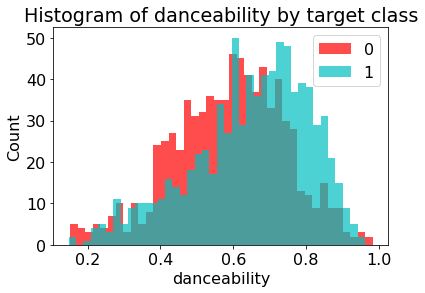

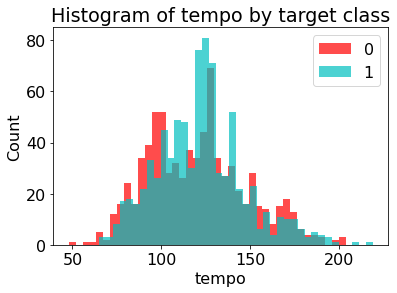

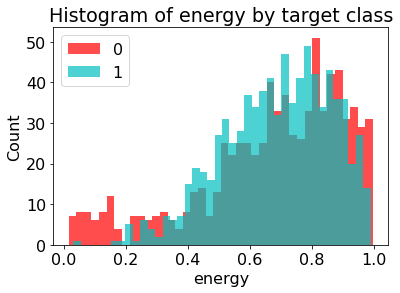

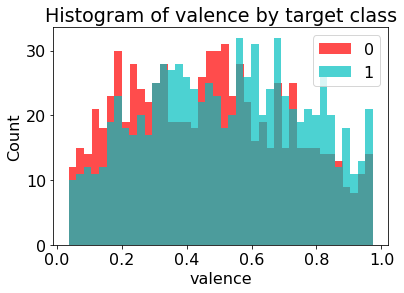

In [8]:
features = ['danceability', 'tempo', 'energy', 'valence']
for feature in features:
    plt.hist(negative_examples[feature], bins = 40, color = 'r', alpha = 0.7, label = '0')
    plt.hist(positive_examples[feature], bins = 40, color = 'c', alpha = 0.7, label = '1')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(f'Histogram of {feature:s} by target class')
    plt.legend()
    plt.show()

#### 1(e)
rubric={points:4}

Let's say you had to make a decision stump (decision tree with depth 1), _by hand_, to predict the target class. Just from looking at the plots above, describe a reasonable split (feature name and threshold) and what class you would predict in the two cases. For example, in the loudness histogram provided earlier on, it seems that very large values of loudness are generally disliked (more blue on the right side of the histogram), so you might answer something like this: "A reasonable split would be to predict 0 if loudness > -5 (and predict 1 otherwise)."

**In the danceability histogram, it seems that high values of danceability are mostly liked (more <span style='background:cyan'>cyan</span> on the right side of the histogram) while low values of danceability are generaly disliked (more <span style='background:red'>red</span> on the left side of the histogram). This separation happens at around danceability of 0.7. As a result, a reasonable split would be to predict 1 if danceability > 0.7 and 0 otherwise.**

#### 1(f)
rubric={points:2}

Let's say that, for a particular feature, the histograms of that feature are identical for the two target classes. Does that mean the feature is not useful for predicting the target class?



**Yes. High similarity of target classes in a certain feature causes the model to perform poorly. The goal of the Machine Learning model is to find a function that separates classes. In a case where two classes are very similar the ML algorithm can't find a function to separate the two. A method to fix this problem is to add other features to the model. Transforming the data to a new feature space might help with this situation.**

#### 1(g) 
rubric={points:2}

Note that the dataset includes two free text features labeled `song_title` and `artist`:

In [9]:
df_train[["song_title", "artist"]].head()

,song_title,artist
260,WTF (Where They From) [feat. Pharrell Williams],Missy Elliott
1286,"10,000 Reasons (Bless the Lord) [Radio Version]",Matt Redman
1344,American Dream,Chelsea Grin
1197,Feel This Moment,Pitbull
119,Trap Queen,Fetty Wap


- Do you think these features could be useful in predicting whether the user liked the song or not? 
- Would there be any difficulty in using them in your model?   

* **I think these features can also be useful in predicting whether the user likes the song or not. If the song title contains certain words (such as "dance" or "love") the user might like the song while certain other words in the song title might lead to the user not liking the song. The same goes for the artist name.**

* **There might be some difficulty with using text as a feature in our ML model. In this setting, the relation of the words and how they are arranged in a sentence is more important than individual words. One of two different songs with titles that contain the same word can be liked and the other not. The user can might like a song titled "love is good" and not like a song titled "love is bad". On the other hand, the same user might not like the song "Satan is good" and like the song "Satan is bad". This confirms that the relation and arrangement of words is more important than individual words. This can be one of the difficulties of an ML model in this case. Also, some song titles include words that are not in the dictionary and have to be taken care of with other methods.**

## Exercise 2: Using sklearn to build a decision tree classifier

#### 2(a) 
rubric={points:2}

- Create `X_train` and `y_train` and `X_test` and `y_test` from `df_train` and `df_test` above. Skip the `song_title` and `artist` features for now. 
- Fit a `DecisionTreeClassifier` on the train set.

In [10]:
X_train = df_train.drop(columns=['target','song_title','artist'])
y_train = df_train['target']
X_test = df_test.drop(columns=['target','song_title','artist'])
y_test = df_test['target']

In [11]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train);

#### 2(b)
rubric={points:2}

Use the `predict` method to predict the class of the first example in your `X_train`. Is the prediction correct? That is, does it match with the corresponding class in `y_train`?  

> Hint: you can grab the first example with `X_train.iloc[[0]]`.

In [12]:
print(f'The first example class in y_train is {y_train.iloc[0]:d}')

predicted = model.predict(X_train.iloc[[0]])

print(f'The first predicted example class is {predicted[0]:d}')

if (predicted[0] == y_train.iloc[0]):
    print('The prediction is correct.')
else:
    print('The prediction is not correct.')

The first example class in y_train is 1
The first predicted example class is 1
The prediction is correct.


#### 2(c) 
rubric={points:2}

Use the `cross_val_score` function on your training set to compute the 10-fold cross-validation accuracy of your tree. 

In [13]:
cv_score = cross_val_score(model, X_train, y_train, cv = 10)
cv_score

array([0.69135802, 0.60493827, 0.65432099, 0.74534161, 0.73291925,
       0.61490683, 0.76397516, 0.75776398, 0.64596273, 0.68322981])

In [14]:
print(f'Average cross-validation score is {np.mean(cv_score):f}')
print(f'Standard Deviation of cross-validation score is {np.std(cv_score):f}')

Average cross-validation score is 0.689472
Standard Deviation of cross-validation score is 0.055768


#### 2(d)
rubric={points:2}

The above is useful, but we would like to see the training accuracy as well. 

- Compute the 10-fold cross-validation again but this time using the `cross_validate` function with `return_train_score=True`. 
- Print out both the cross-validation score and the training score.
- Is your cross-validation score exactly the same as what you got in the previous part? Very briefly discuss.

In [15]:
model_score = cross_validate(model, X_train, y_train, cv = 10, return_train_score = True)
pd.DataFrame(model_score)

,fit_time,score_time,test_score,train_score
0,0.040496,0.006155,0.660494,0.999311
1,0.044333,0.006186,0.635802,0.998622
2,0.037250,0.000990,0.672840,0.999311
3,0.036712,0.003524,0.701863,0.998623
4,0.039333,0.005571,0.732919,0.998623
5,0.032302,0.007575,0.633540,0.998623
6,0.031742,0.003440,0.745342,0.998623
7,0.042837,0.003605,0.726708,0.999311
8,0.036019,0.004636,0.633540,0.999311
9,0.031089,0.000000,0.714286,0.998623


In [16]:
pd.DataFrame({'mean' : pd.DataFrame(model_score).mean(),
             'std' : pd.DataFrame(model_score).std()})

,mean,std
fit_time,0.037211,0.004605
score_time,0.004168,0.002370
test_score,0.685733,0.043816
train_score,0.998898,0.000356


**The cross-validation score is not exactly the same as in the previous part. There is a slight difference of order $10^{-3}$ between the two values. The score in the previous section is slightly higher than the present section. This difference can be the result of the underlying working conditions of the two methods. `cross_validate` is similar to `cross_val_score` but more powerful. As a result it can better find the inaccuracies of the model.**

#### 2(e)
rubric={points:1}

Do you see a significant difference between the training score and the cross-validation score? Briefly discuss.

**There is a high difference between the training score and cross-validation score. On the other hand, the training score is very close to 1. This means that our model is over-fitted (high variance).**

#### 2(f)
rubric={points:1}

Inspect the 10 sub-scores from the 10 folds of cross-validation. How does this inform the trustworthiness of your cross validation score?

**The results for this section are presented in 2(c) and 2(d).**

**Both of the 10 sub scores from `cross_validate` and `cross_val_score` have very low variance of ~0.05. This means that our cross-validation score is reliable. Low variance in cross-validation score means that training and then scoring based on all the different subsets of training and validation data gives more or less the same score. As a result, the model has similar sensitivity to the training data in all folds.**

## Exercise 3: Hyperparameters 
rubric={points:10}

In this exercise, you'll experiment with the `max_depth` hyperparameter of the decision tree classifier. See the [`DecisionTreeClassifier` documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html) for more details.

- Explore the `max_depth` hyperparameter. Run 10-fold cross-validation for trees with different values of `max_depth` (at least 10 different values in the range 1 to 25).
- For each `max_depth`, get both the train accuracy and the cross-validation accuracy.
- Make a plot with `max_depth` on the *x*-axis and the train and cross-validation scores on the *y*-axis. That is, your plot should have two curves, one for train and one for cross-validation. Include a legend to specify which is which.
- Discuss how changing the `max_depth` hyperparameter affects the training and cross-validation accuracy. From these results, what depth would you pick as the optimal depth? 
- Do you think that the depth you chose would generalize to other "spotify" datasets (i.e., data on other spotify users)?

> Note: generally speaking (for all assignments) you are welcome to copy/paste code directly from the lecture notes, though I ask that you add a small citation (e.g. "Adapted from lecture 2") if you do so.

In [17]:
scores = {'depth': [],
          'train_score_mean': [], 
          'train_score_std': [],
          'cv_score_mean': [],
          'cv_score_std': []}

for depth in range(1, 26):
    model = DecisionTreeClassifier(max_depth = depth)
    model_score = cross_validate(model, X_train, y_train, cv = 10, return_train_score = True)
    scores['depth'].append(depth)
    scores['train_score_mean'].append(np.mean(model_score['train_score']))
    scores['train_score_std'].append(np.std(model_score['train_score']))
    scores['cv_score_mean'].append(np.mean(model_score['test_score']))
    scores['cv_score_std'].append(np.std(model_score['test_score']))

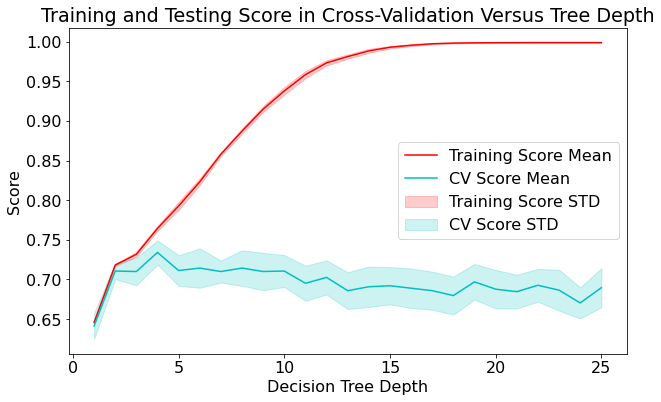

In [18]:
plt.figure(figsize = [10, 6])
plt.plot(scores['depth'], scores['train_score_mean'], c = 'r', label = 'Training Score Mean')
plt.fill_between(scores['depth'],
                 np.subtract(scores['train_score_mean'], np.divide(scores['train_score_std'], 2.0)),
                 np.add(scores['train_score_mean'], np.divide(scores['train_score_std'], 2.0)),
                 color = 'r', alpha = 0.2, label = 'Training Score STD')
plt.plot(scores['depth'], scores['cv_score_mean'], c = 'c', label = 'CV Score Mean')
plt.fill_between(scores['depth'],
                 np.subtract(scores['cv_score_mean'], np.divide(scores['cv_score_std'], 2.0)),
                 np.add(scores['cv_score_mean'], np.divide(scores['cv_score_std'], 2.0)),
                 color = 'c', alpha = 0.2, label = 'CV Score STD')
plt.xlabel('Decision Tree Depth')
plt.ylabel('Score')
plt.title('Training and Testing Score in Cross-Validation Versus Tree Depth')
plt.legend()
plt.show()

* **For decision trees with small depth (<2) we have an under-fitted model (high bias). In this case the model has not yet learned the important patterns in the data set (hence biased). Here, both accuracy of training as well as cross-validation are low. These two values are close together. Increasing the tree depth causes the training score to go up. For trees with high depth, the model predicts the training data very well because it has learned all the small details and quirks of the data (high variance). This case does not predict the validation data very well because these small quirks are not representative of the overall important patterns in the validation data (hence variance). As seen, for high values of depth the cross-validation score goes down and we have a big difference between cross-validation and training scores. The sweet spot for the depth of our decision tree model is the one which gives the highest cross-validation score result. In this case, the depth of 4 is promising both because the validation score is maximum and the difference between validation and training scores is pretty low.**
* **The maximum depth of 4 was optimal for the current user. However, the same depth will not be an optimum selection for other spotify datasets. The main reason for this is that each spotify user has their own pattern of liking different songs. There is no guarantee that a depth of 4 will correlate to the best learning depth of an ML model for all users. The complexity of patterns for a certain user might be only 3 branches deep while for others it might be more (or less).**

## Exercise 4: Test set
rubric={points:4}

Remember the test set you created way back at the beginning of this assignment? Let's use it now to see if our cross-validation score from the previous exercise is trustworthy. 

- Select your favorite `max_depth` from the previous part.
- Train a decision tree classifier using that `max_depth` on the _entire training set_.
- Compute and display the test score. 
- How does it compare to the cross-validation score from the previous exercise? Briefly discuss. 

In [19]:
depth = 4
model = DecisionTreeClassifier(max_depth = depth)
model.fit(X_train, y_train)

print(f"Test score is {model.score(X_test, y_test):f}")
print(f"Cross-Validation score is {scores['cv_score_mean'][3]:f}")
if (model.score(X_test, y_test) > scores['cv_score_mean'][3]):
    print('Test score is higher than the Cross-Validation score!')
else:
    print('Test score is smaller than the Cross-Validation score.')

Test score is 0.693069
Cross-Validation score is 0.734023
Test score is smaller than the Cross-Validation score.


**The test score and cross validation score are very close together. T test score is smaller than the cross-validation score and that was to be expected. The reason for this is that cross validation is performed multiple times on different portions of the training data which makes it more familiar with the data. On the other hand, the test data is only used once to find a score for our ML model. Test data is more "wild" than the validation data. That's why cross-validation score is higher than test score.**

## Exercise 5: Conceptual questions
rubric={points:3}

Consider the dataset below, which has $6$ examples and $2$ features:

$$ X = \begin{bmatrix}5 & 2\\4 & 3\\  2 & 2\\ 10 & 10\\ 9 & -1\\ 9& 9\end{bmatrix}, \quad y = \begin{bmatrix}-1\\-1\\+1\\+1\\+1\\+1\end{bmatrix}.$$

1. Say we fit a decision stump (depth 1 decision tree) and the first split is on the first feature (left column) being less than 5.5. What would we predict in the "true" and "false" cases here?
2. What training accuracy would the above stump get on this data set?
3. Can we obtain 100% accuracy with a single decision stump in this particular example?

In [20]:
X=np.array([[5, 2],
            [4, 3],
            [2, 2],
            [10, 10],
            [9, -1],
            [9, 9]])
y=np.array([[-1], [-1], [1], [1], [1], [1]])

1- **In this case, any entry of the first feature smaller than 5.5 will be considered -1 (true) and if the feature is larger than 5.5 will be considered +1 (false). As you can see, this decision stump makes a mistake when predicting the first feature equal to 2.**

2- **The accuracy can be computed by the ratio of the correct predictions to the total predictions ($\text{Accuracy}=\dfrac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}$). In this case, we have 5 correct predictions vs total of 6 predictions which gives us an accuracy of 0.8333.**

3- **DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS DISCUSS**

In [24]:
model = DecisionTreeClassifier(max_depth = 1)
model.fit(X, y)
model.score(X, y)

0.8333333333333334

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 